
Logistic Regression
Accuracy: 0.979
Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.98      0.97        54
      benign       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


KNN (k=5)
Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        54
      benign       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Decision Tree
Accuracy: 0.951
Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost (opt)
Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        54
      benign       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



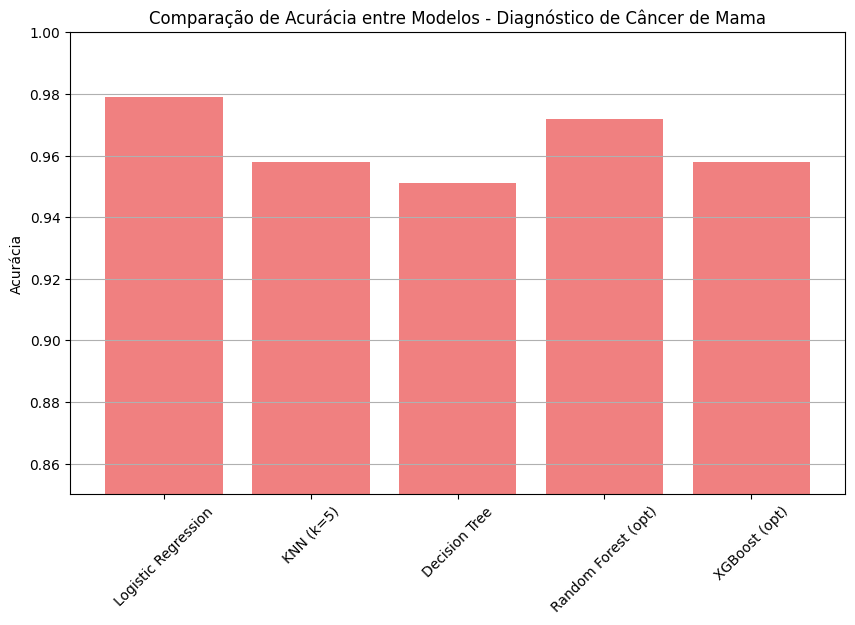

In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# 2. Carregar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3. Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 4. Modelos e otimização
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Otimização de Random Forest
rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions={
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
    },
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
models["Random Forest (opt)"] = rf

# Otimização de XGBoost
xgb_model = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions={
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
    },
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
models["XGBoost (opt)"] = xgb_model

# 5. Avaliação
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# 6. Gráfico comparativo
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='lightcoral')
plt.title("Comparação de Acurácia entre Modelos - Diagnóstico de Câncer de Mama")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.grid(axis='y')
plt.show()
